This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/6_support_vector_machine/)

# SVM: Maximum margin separating hyperplane

Plot the maximum margin separating hyperplane within a two-class
separable or not dataset using a Support Vector Machine classifier with
linear and nonlinear kernels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

def svm_fit_disp(clf, separable=True):
    """
    1. make a simple two-class dataset of 2D points 
       to fit a Support Vector Machine classifier 'clf'.
       By defaut the dataset is separable.
     
    2. display the  maximum margin separating hyperplane and 
       the margin boundaries and the support vectors
    """
    
    # we create 40 separable, or not,  2D points
    X, y = make_classification(n_samples=40, n_features=2, n_informative=2,
                               n_redundant=0, class_sep= 2, random_state=2,
                               flip_y=0 if separable else 0.1)
    # fit the model
    clf.fit(X, y)

    # plot the training samples
    fig, ax = plt.subplots(1,1,figsize=(9,6))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 60)
    yy = np.linspace(ylim[0], ylim[1], 60)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    cs = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    # Recast levels with decision boundary and margin labels
    cs.levels = ['margin','hyperplane','margin']
    ax.clabel(cs, cs.levels, inline=True, fontsize=12)
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k',label='support vectors')
    plt.legend(fontsize=14)
    plt.show()

**Exercise I (linear kernel):**

Remember that for _soft-margin_ SVM, we’re trying to maximize the margin for the separating hyperplane, while accounting for a penalty when a sample is either misclassified or within the margin boundary. 
The penalty, or cost, parameter $C$ controls the strengh of this penalty and trades off correct classification of training samples against maximization of the decision function's margin.
- for larger values of $C$, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
- a lower $C$ will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In other words $C$ behaves as an *inverse* regularization parameter in the SVM.

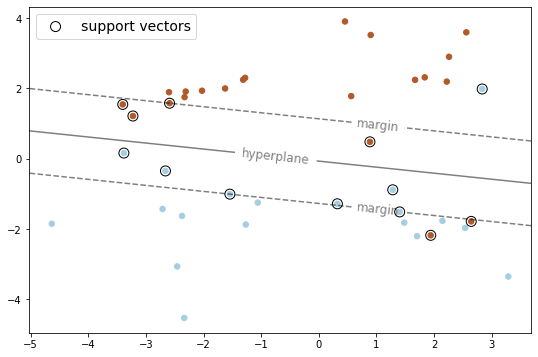

In [19]:
svm_fit_disp(svm.SVC(kernel='linear', C=1000), separable=False)

*Questions*
1. Separable dataset 
 - In this separable dataset does the SVM solution (here, a large cost parameter  $C=100$) separates perfectly the two-class training samples? How many are the vector supports? 
 - Why when $C$ is large the solution for a separable dataset  converges to the _hard-margin_ case? 
 - Gradually decrease the cost parameter  `C` s.t. $C=100, 10, 1, 0.1, 0.01$. Note the possible changes for both the decision function and the margins/vector supports. Does the 
decision boudary still separate perfectly the two classes?
2. Nonseparable dataset
 - Set`separable=False`  to make the dataset nonseparable, and play on the values of C as above. Does the solution still strongly depend on $C$?

**Exercise II (nonlinear kernel):**

The gaussian, also known as radial basis function (RBF), kernel is defined as:
$$
K(x, y) = \exp(-\gamma ||x-y||^2),
$$
where the $\gamma>0$ parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. 

The behavior of the radial basis function (RBF) svm kernel is very sensitive to the $\gamma$ parameter:
- if $\gamma$ is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

- when $\gamma$ is very small, the model is too constrained and cannot capture the complexity or "shape" of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

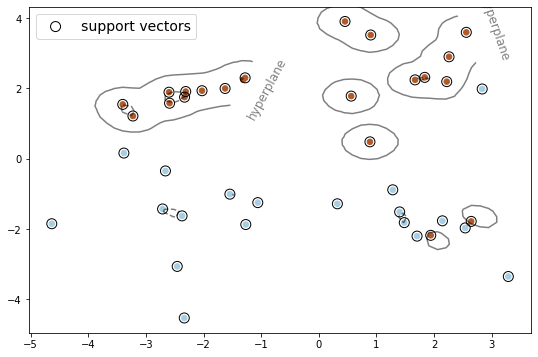

In [22]:
svm_fit_disp(svm.SVC(kernel='rbf', gamma=10, C=1), separable=False)

*Questions*
- For the current SVM parameters, can you explain why the solution is not very different from the linear kernel?
- What do you observe for a larger value of $C$, e.g. `C=1000`? Does the separating hyperplane is still a true hyperplane in the input space?
- increase gradually the RBF kernel parameter  $\gamma$ from $0.01$ to $10$ (you can reset the regularization parameter to the previous value `C=1`). What do you observe? What should be appropriate values of $\gamma$ here?